<a href="https://colab.research.google.com/github/AndyOmondi17/CompilerConstruction/blob/main/Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Group Members: 105493, 101170, 112448**

**Lab Activity 1:Flex,Bison,Lex,Yacc**

**Flex(fast lexical analyzer generator)**-A tool/computer program for generating lexical analyzers (scanners or lexers) written by Vern Paxson in C around 1987.A scanner divides this into the tokens alpha, equal sign, beta, plus sign, gamma, and semicolon. Then the parser determines that beta + gamma is an expression, and that the expression is assigned to alpha.

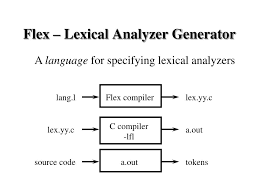


In [ ]:
/* scanner for a toy Pascal-like language */

%{
/* need this for the call to atof() below */
#include <math.h>
%}

DIGIT    [0-9]
ID       [a-z][a-z0-9]*

%%

{DIGIT}+    {
            printf( "An integer: %s (%d)\n", yytext,
                    atoi( yytext ) );
            }

{DIGIT}+"."{DIGIT}*        {
            printf( "A float: %s (%g)\n", yytext,
                    atof( yytext ) );
            }

if|then|begin|end|procedure|function        {
            printf( "A keyword: %s\n", yytext );
            }

{ID}        printf( "An identifier: %s\n", yytext );

"+"|"-"|"*"|"/"   printf( "An operator: %s\n", yytext );

"{"[^}\n]*"}"     /* eat up one-line comments */

[ \t\n]+          /* eat up whitespace */

.           printf( "Unrecognized character: %s\n", yytext );

%%

main( argc, argv )
int argc;
char **argv;
    {
    ++argv, --argc;  /* skip over program name */
    if ( argc > 0 )
            yyin = fopen( argv[0], "r" );
    else
            yyin = stdin;

    yylex();
    }

**Bison**

**Lex** It is a program that generates lexical analyzer. It is used with YACC parser generator.The lexical analyzer is a program that transforms an input stream into a sequence of tokens.It reads the input stream and produces the source code as output through implementing the lexical analyzer in the C program.

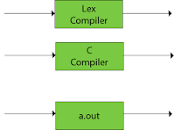

In [ ]:
/*lex program to count number of words*/
%{
#include<stdio.h>
#include<string.h>
int i = 0;
%}
  
/* Rules Section*/
%%
([a-zA-Z0-9])*    {i++;} /* Rule for counting 
                          number of words*/
  
"\n" {printf("%d\n", i); i = 0;}
%%
  
int yywrap(void){}
  
int main()
{   
    // The function that starts the analysis
    yylex();
  
    return 0;


**Yacc**-Yet Another Compiler-Compiler.It provides a general tool for imposing structure on the input to a computer program.A parser, calls the user-supplied low-level input routine (the lexical analyzer) to pick up the basic items (called tokens) from the input stream. These tokens are organized according to the input structure rules, called grammar rules; when one of these rules has been recognized, then user code supplied for this rule, an action, is invoked; actions have the ability to return values and make use of the values of other actions.

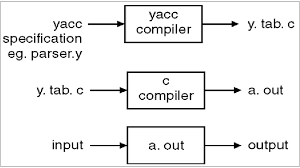

In [ ]:
%{
/*** Auxiliary declarations section ***/

#include<stdio.h>
#include<stdlib.h>

/* Custom function to print an operator*/
void print_operator(char op);

/* Variable to keep track of the position of the number in the input */
int pos=0;

%}

 /*** YACC Declarations section ***/
%token DIGIT
%left '+'
%left '*'
%%

/*** Rules Section ***/
start : expr '\n'		{exit(1);}
      ;

expr: expr '+' expr     {print_operator('+');}
    | expr '*' expr     {print_operator('*');}
    | '(' expr ')'
    | DIGIT             {printf("NUM%d ",pos);}
    ;

%%


/*** Auxiliary functions section ***/

void print_operator(char c){
    switch(c){
        case '+'  : printf("PLUS ");
                    break;
        case '*'  : printf("MUL ");
                    break;
    }
    return;
}

yyerror(char const *s)
{
    printf("yyerror %s",s);
}

yylex(){
    char c;
    c = getchar();
    if(isdigit(c)){
        pos++;
        return DIGIT;
    }
    else if(c == ' '){
        yylex();         /*This is to ignore whitespaces in the input*/
    }
    else {
        return c;
    }
}

main()
{
	yyparse();
	return 1;
}

**Refferences**

Flex (Fast Lexical Analyzer Generator ). (2018, April 12). GeeksforGeeks. https://www.geeksforgeeks.org/flex-fast-lexical-analyzer-generator/

Yacc Yet Another Compiler Compiler by Stephen C. Johnson. (n.d.). Www.cs.utexas.edu. Retrieved September 13, 2022, from https://www.cs.utexas.edu/users/novak/yaccpaper.htm

‌Lex Program to count number of words. (2018, May 15). GeeksforGeeks. https://www.geeksforgeeks.org/lex-program-count-number-words/

‌LEX - javatpoint. (n.d.). Www.javatpoint.com. https://www.javatpoint.com/lex

‌

‌